The mean value is:21.901678657074342
The std deviation is:13.30097712147297


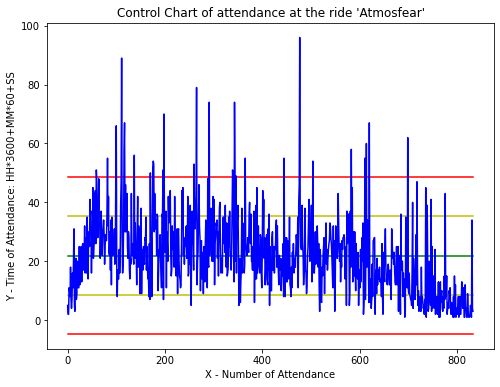

In [53]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

#c.execute("select strftime('%H',timestamp)*3600+strftime('%M',timestamp)*60+strftime('%S',timestamp) from checkin as ch, attraction where attraction=AttractionID and name='Atmosfear' and ch.type='actual' order by timestamp;")
c.execute("select strftime('%H',timestamp)*60+strftime('%M',timestamp),count(strftime('%H',timestamp)*60+strftime('%M',timestamp)) from checkin as ch, attraction where attraction=AttractionID and name='Atmosfear' and ch.type='actual' group by strftime('%H',timestamp)*60+strftime('%M',timestamp) order by strftime('%H',timestamp)*60+strftime('%M',timestamp);")
visitData = c.fetchall()

data=[]
for row in visitData:
    data.append(row[1])

#dataframe = pd.DataFrame.from_records(visitData,columns=['ckcount'])
#data=dataframe.to_numpy()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X - An ordinary Sequence number')  # Add an x-label to the axes.
ax.set_ylabel('Y - Time of Attendance: HH*60+MM')  # Add a y-label to the axes.
ax.set_title("Control Chart of attendance at the ride 'Atmosfear'")


#Compute the mean and standard deviation of the temperature values.
mean = np.nanmean(data)
std = np.nanstd(data)
print("The mean value is:{}".format(mean))
print("The std deviation is:{}".format(std))

#Plot the mean, standard deviation lines, and the temperatures all on the same graph.
plt.plot([0,len(data)],[mean,mean],'g-')
plt.plot([0,len(data)],[mean+std, mean+std], 'y-')
plt.plot([0,len(data)],[mean-std, mean-std], 'y-')
plt.plot([0,len(data)],[mean+2*std, mean+2*std], 'r-')
plt.plot([0,len(data)],[mean-2*std, mean-2*std], 'r-')
plt.plot(range(len(data)), data, 'b-')
plt.show()

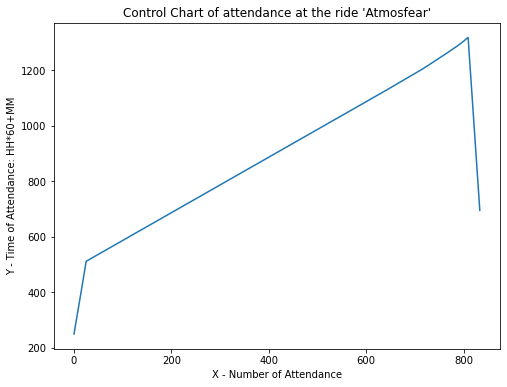

In [57]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute("select strftime('%H',timestamp)*60+strftime('%M',timestamp),count(strftime('%H',timestamp)*60+strftime('%M',timestamp)) from checkin as ch, attraction where attraction=AttractionID and name='Atmosfear' and ch.type='actual' group by strftime('%H',timestamp)*60+strftime('%M',timestamp) order by strftime('%H',timestamp)*60+strftime('%M',timestamp);")
visitData = c.fetchall()

data=[]
for row in visitData:
    data.append(row[0])
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X - An ordinary Sequence number')  # Add an x-label to the axes.
ax.set_ylabel('Y - Time of Attendance: HH*60+MM')  # Add a y-label to the axes.
ax.set_title("Control Chart of attendance at the ride 'Atmosfear'")

window_size=50
#Compute and Plot the moving average
plt.plot(np.convolve(data, np.ones(window_size,)/window_size, 'same'))
plt.show()

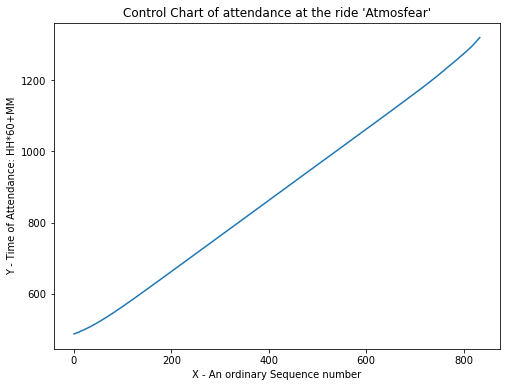

In [59]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
#Also import Pandas, which has a built-in Exponential Weighted Moving Average function
import pandas as pd

db_filename = 'dinofunworld-2.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

c.execute("select strftime('%H',timestamp)*60+strftime('%M',timestamp),count(strftime('%H',timestamp)*60+strftime('%M',timestamp)) from checkin as ch, attraction where attraction=AttractionID and name='Atmosfear' and ch.type='actual' group by strftime('%H',timestamp)*60+strftime('%M',timestamp) order by strftime('%H',timestamp)*60+strftime('%M',timestamp);")
visitData = c.fetchall()

data=[]
for row in visitData:
    data.append(row[0])
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('X - An ordinary Sequence number')  # Add an x-label to the axes.
ax.set_ylabel('Y - Time of Attendance: HH*60+MM')  # Add a y-label to the axes.
ax.set_title("Control Chart of attendance at the ride 'Atmosfear'")

#Span serves the same purpose as "window size" in the moving average.
span=50
#Convert the np array of temperatures into a dataframe
df = pd.DataFrame({'data': data})
#Perform the Exp. Moving Average computation
df_exp = df.ewm(span=50).mean()

plt.plot(df_exp)
plt.show()